In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# rOT

In [2]:
features = pd.read_csv('rOT/features.csv').to_numpy()
labels = pd.read_csv('rOT/labels.csv').to_numpy()

In [3]:
classes = np.unique(labels)
# colors = {'24hrs meloxicam':'r', '24hrs saline':'g', '4hrs carrageenan':'b', 'baseline':'c', 'baseline meloxicam':'k'}
colors = {'24hrs meloxicam':"#58d68d", '24hrs saline':"#f7dc6f", '4hrs carrageenan':"#e59866", 'baseline':"#5d6d7e", 'baseline meloxicam':"#d2b4de"}


meloxicam24h = mpatches.Patch(color="#58d68d", label='24hrs meloxicam')
saline24h = mpatches.Patch(color="#f7dc6f", label='24hrs saline')
carrageenan = mpatches.Patch(color="#e59866", label='4hrs carrageenan')
baseline = mpatches.Patch(color="#5d6d7e", label='baseline')
baselineMeloxicam =  mpatches.Patch(color="#d2b4de", label='baseline meloxicam')

In [4]:

def reduce_dimensions(features,perplexity):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = features
    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions,perplexity=perplexity, random_state=0)
    vectors = tsne.fit_transform(vectors)
    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals


def plot_with_matplotlib(x_vals, y_vals, labels, axis, perplexity):
    import random

    random.seed(0)
    c = []
    for label in labels:
        if label[0] in colors:
            c.append(colors[label[0]])
    axis.scatter(x_vals, y_vals, c=c)
    axis.set_title("Perplexity=%d" % perplexity)

In [9]:

def reduce_dimensions_3D(model,perplexity):
    num_dimensions = 3  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = features
    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions,perplexity=perplexity, random_state=0)
    vectors = tsne.fit_transform(vectors)
    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    z_vals = [v[2] for v in vectors]
    return x_vals, y_vals, z_vals


def plot_with_matplotlib_3D(x_vals, y_vals, z_vals, labels, axis, perplexity):
    import random

    random.seed(0)
    c = []
    for label in labels:
        if label[0] in colors:
            c.append(colors[label[0]])
    axis.scatter(x_vals, y_vals, z_vals, c=c)
    axis.set_title("Perplexity=%d" % perplexity, fontsize=15)

    axis.scatter(x_vals, y_vals, z_vals, c=c)

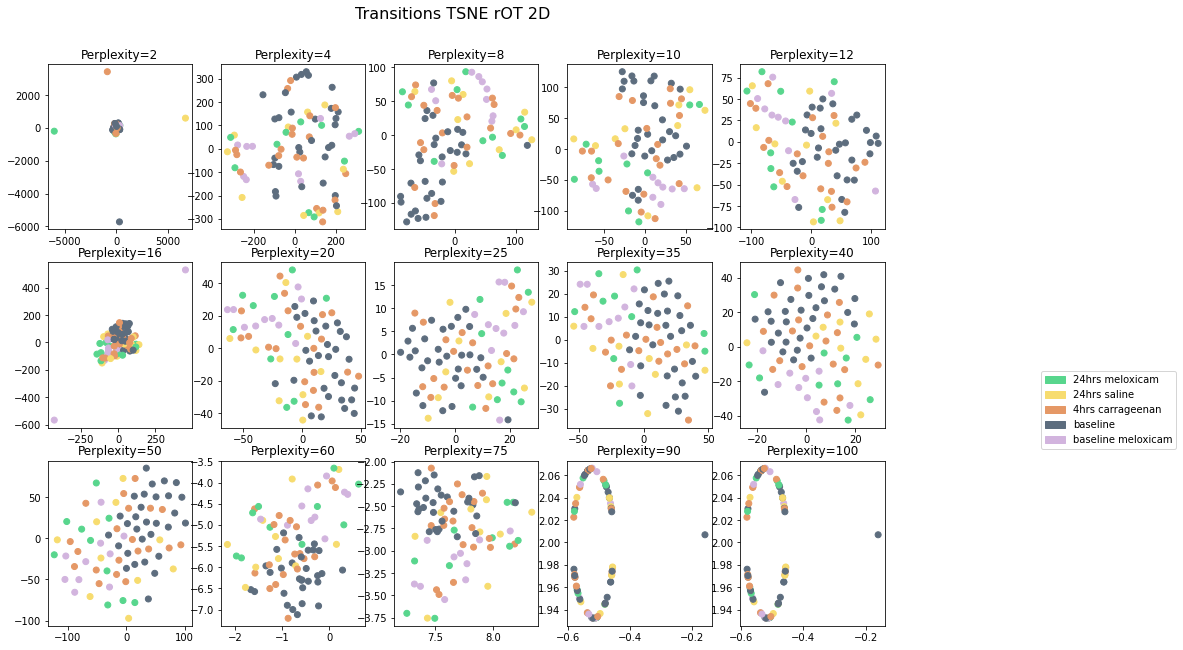

In [8]:
(fig, subplots) = plt.subplots(3,5, figsize = (15,8))
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for ax, perplexity in zip((fig.axes),perplexities):
    x_vals, y_vals = reduce_dimensions(features, perplexity)
    plot_with_matplotlib(x_vals, y_vals, labels, ax, perplexity)

title = fig.suptitle('Transitions TSNE rOT 2D', x=0.5, y=1.2, size='16')
fig.subplots_adjust(top=1.1)
legend = fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam],bbox_to_anchor=(1.04,0.5), loc="center left")
fig.savefig('Transitions_TSNE_rOT_2D.png',bbox_extra_artists=(legend,title), bbox_inches='tight')
    

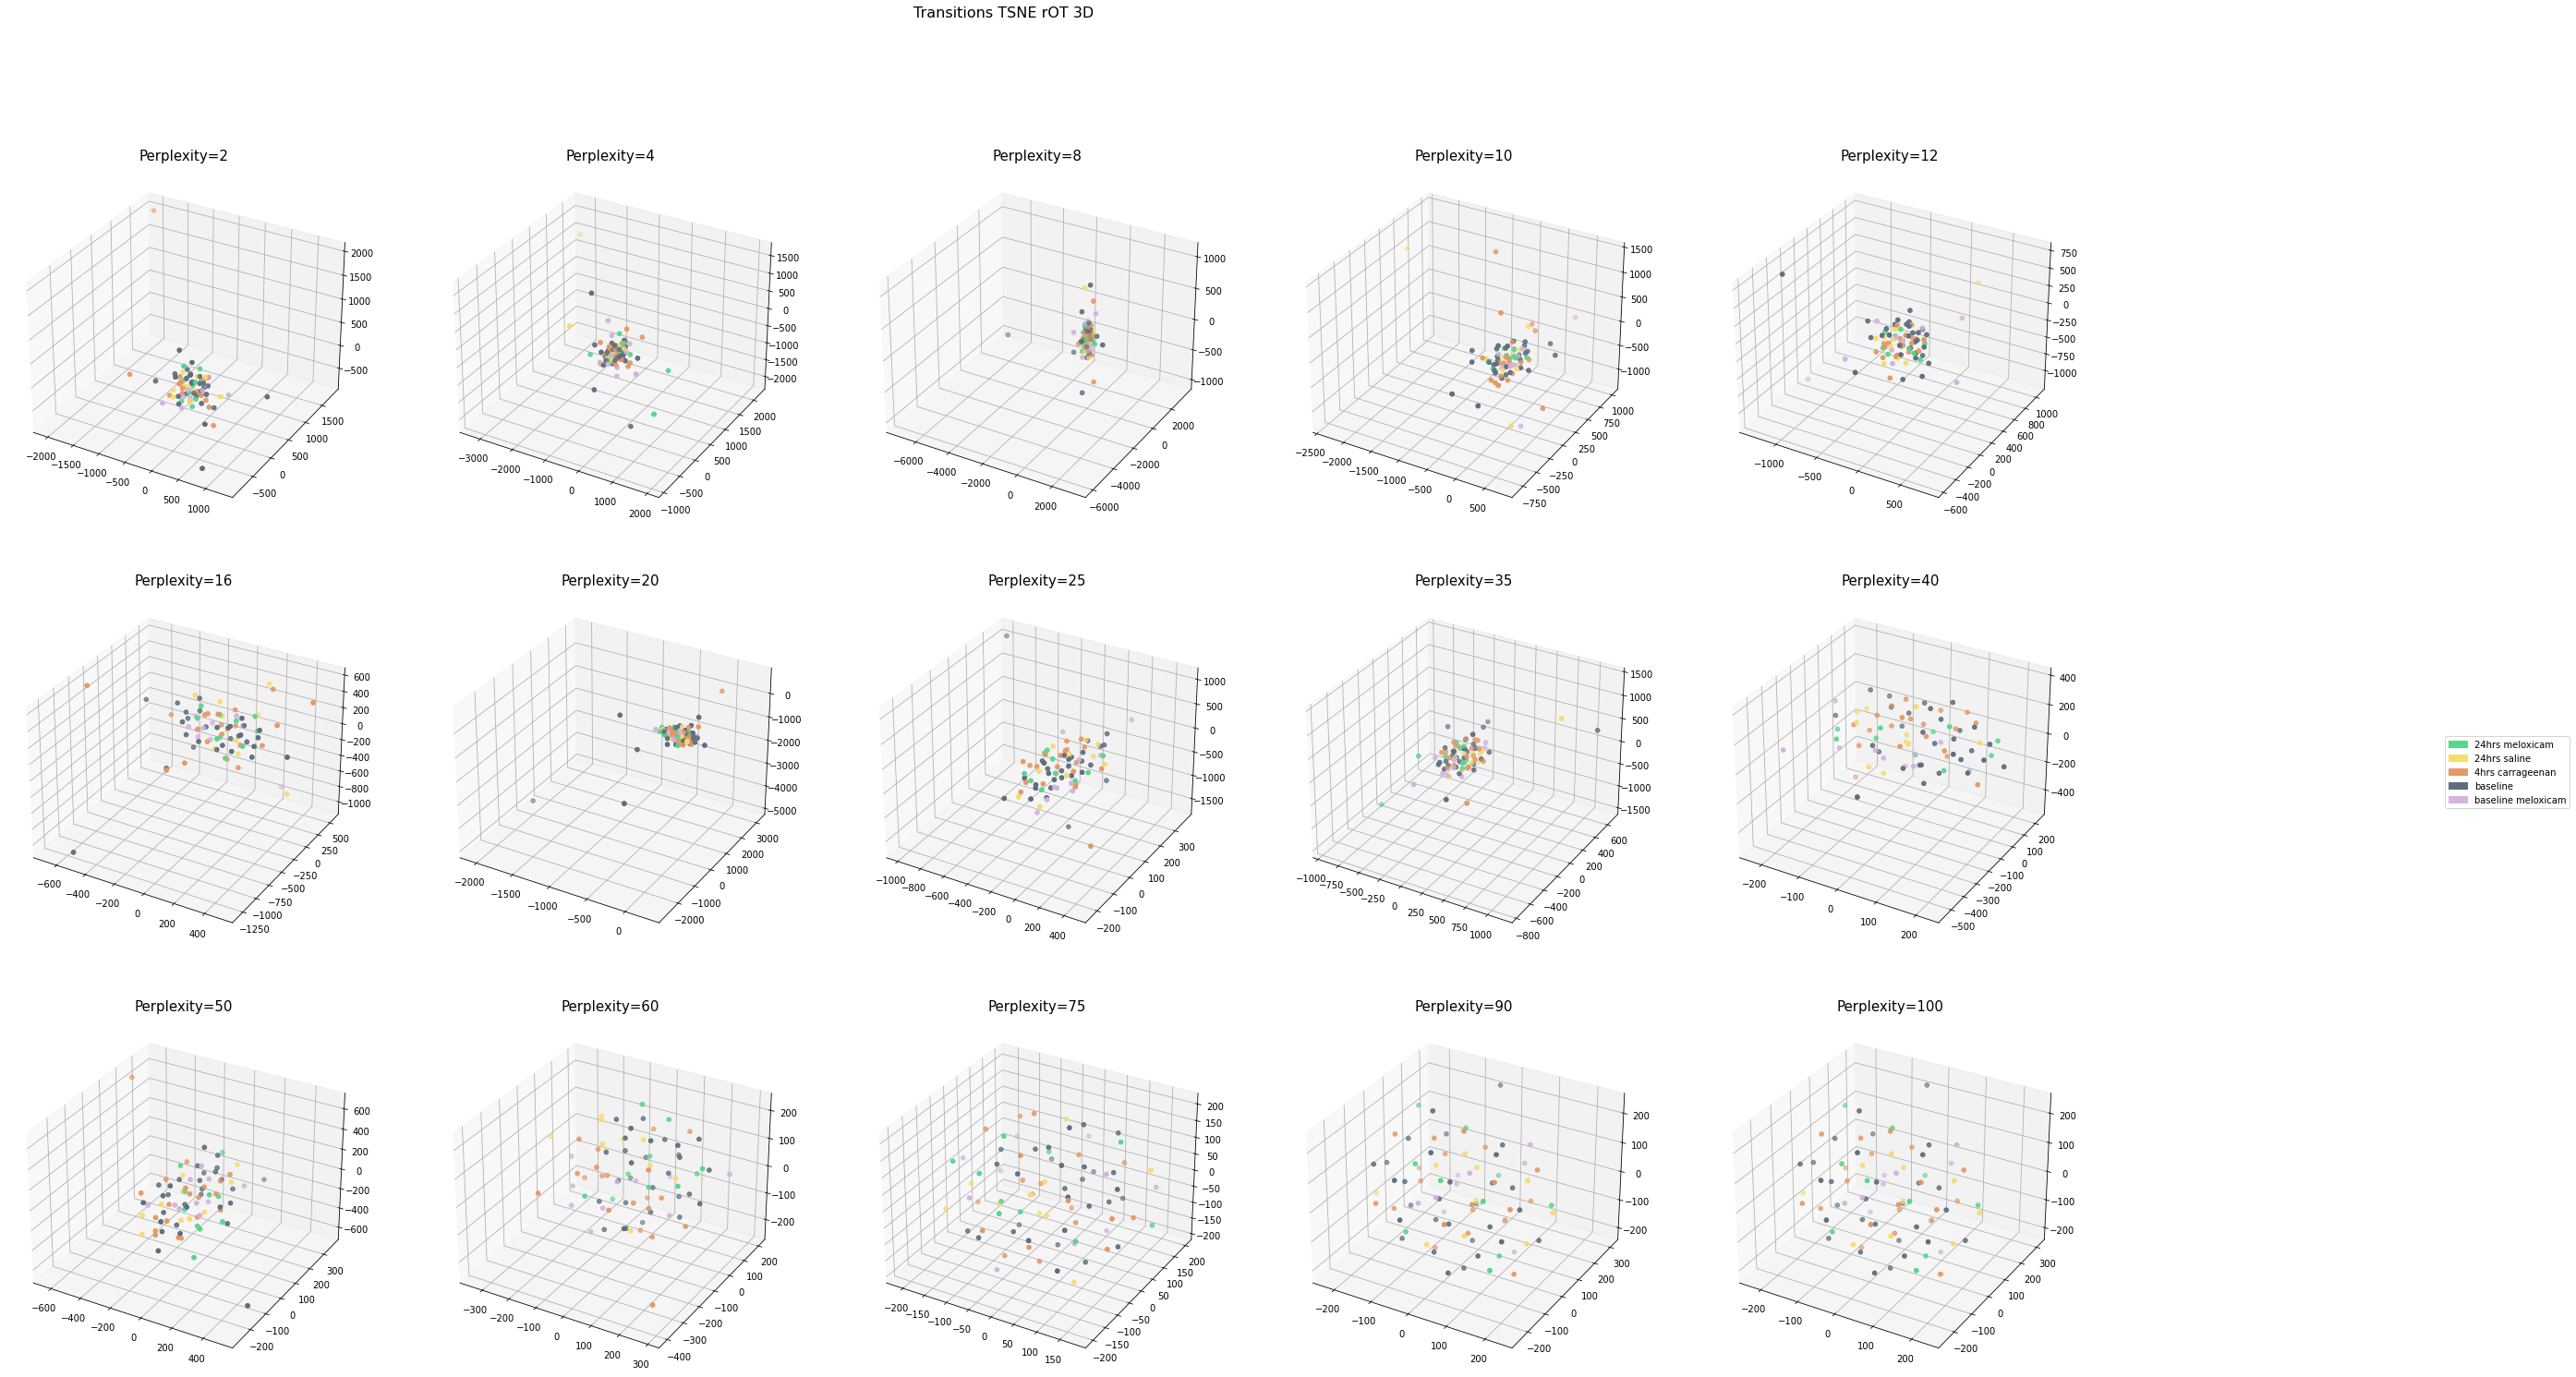

In [10]:
fig = plt.figure(figsize=(40,24))
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for i, perplexity in enumerate(perplexities):
    ax = fig.add_subplot(3, 5, i+1, projection='3d')
    x_vals, y_vals, z_vals = reduce_dimensions_3D(features, perplexity)
    plot_with_matplotlib_3D(x_vals, y_vals, z_vals, labels, ax, perplexity)

title = fig.suptitle('Transitions TSNE rOT 3D', size='16')
fig.subplots_adjust(top=0.88)
legend = fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam],bbox_to_anchor=(1.04,0.5), loc="center left")
fig.savefig('Transitions_TSNE_rOT_3D.png',bbox_extra_artists=(legend,title), bbox_inches='tight')

# rST

In [11]:
features = pd.read_csv('rST/features.csv').to_numpy()
labels = pd.read_csv('rST/labels.csv').to_numpy()

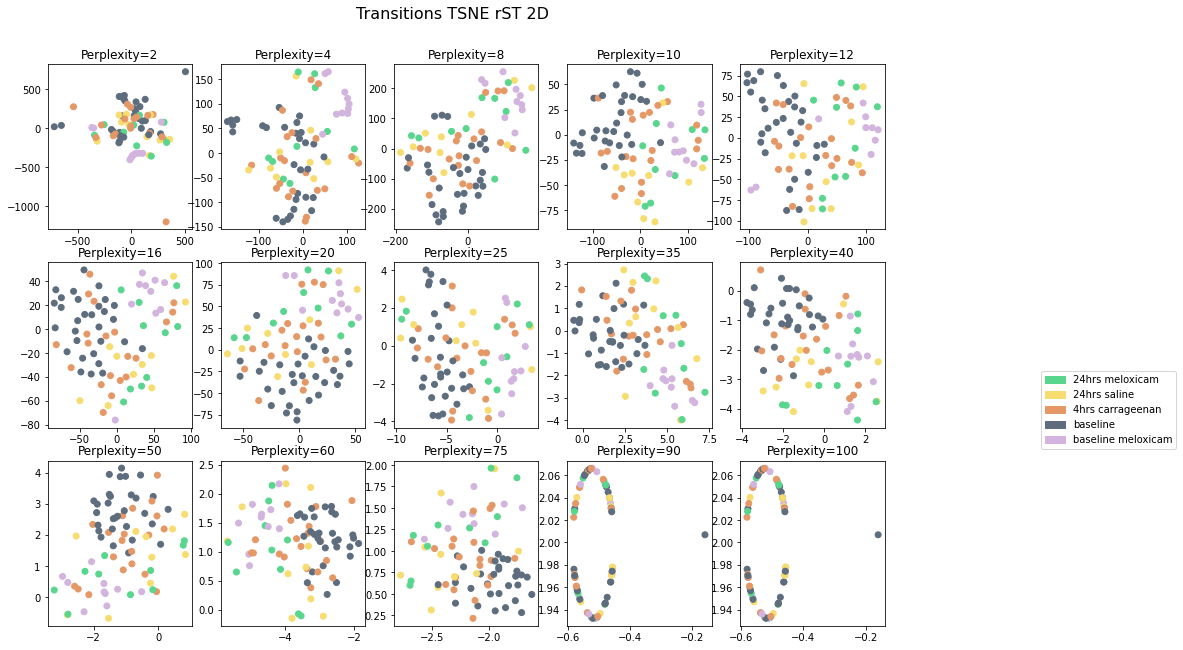

In [12]:
(fig, subplots) = plt.subplots(3,5, figsize = (15,8))
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for ax, perplexity in zip((fig.axes),perplexities):
    x_vals, y_vals = reduce_dimensions(features, perplexity)
    plot_with_matplotlib(x_vals, y_vals, labels, ax, perplexity)

title = fig.suptitle('Transitions TSNE rST 2D', x=0.5, y=1.2, size='16')
fig.subplots_adjust(top=1.1)
legend = fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam],bbox_to_anchor=(1.04,0.5), loc="center left")
fig.savefig('Transitions_TSNE_rST_2D.png',bbox_extra_artists=(legend,title), bbox_inches='tight')

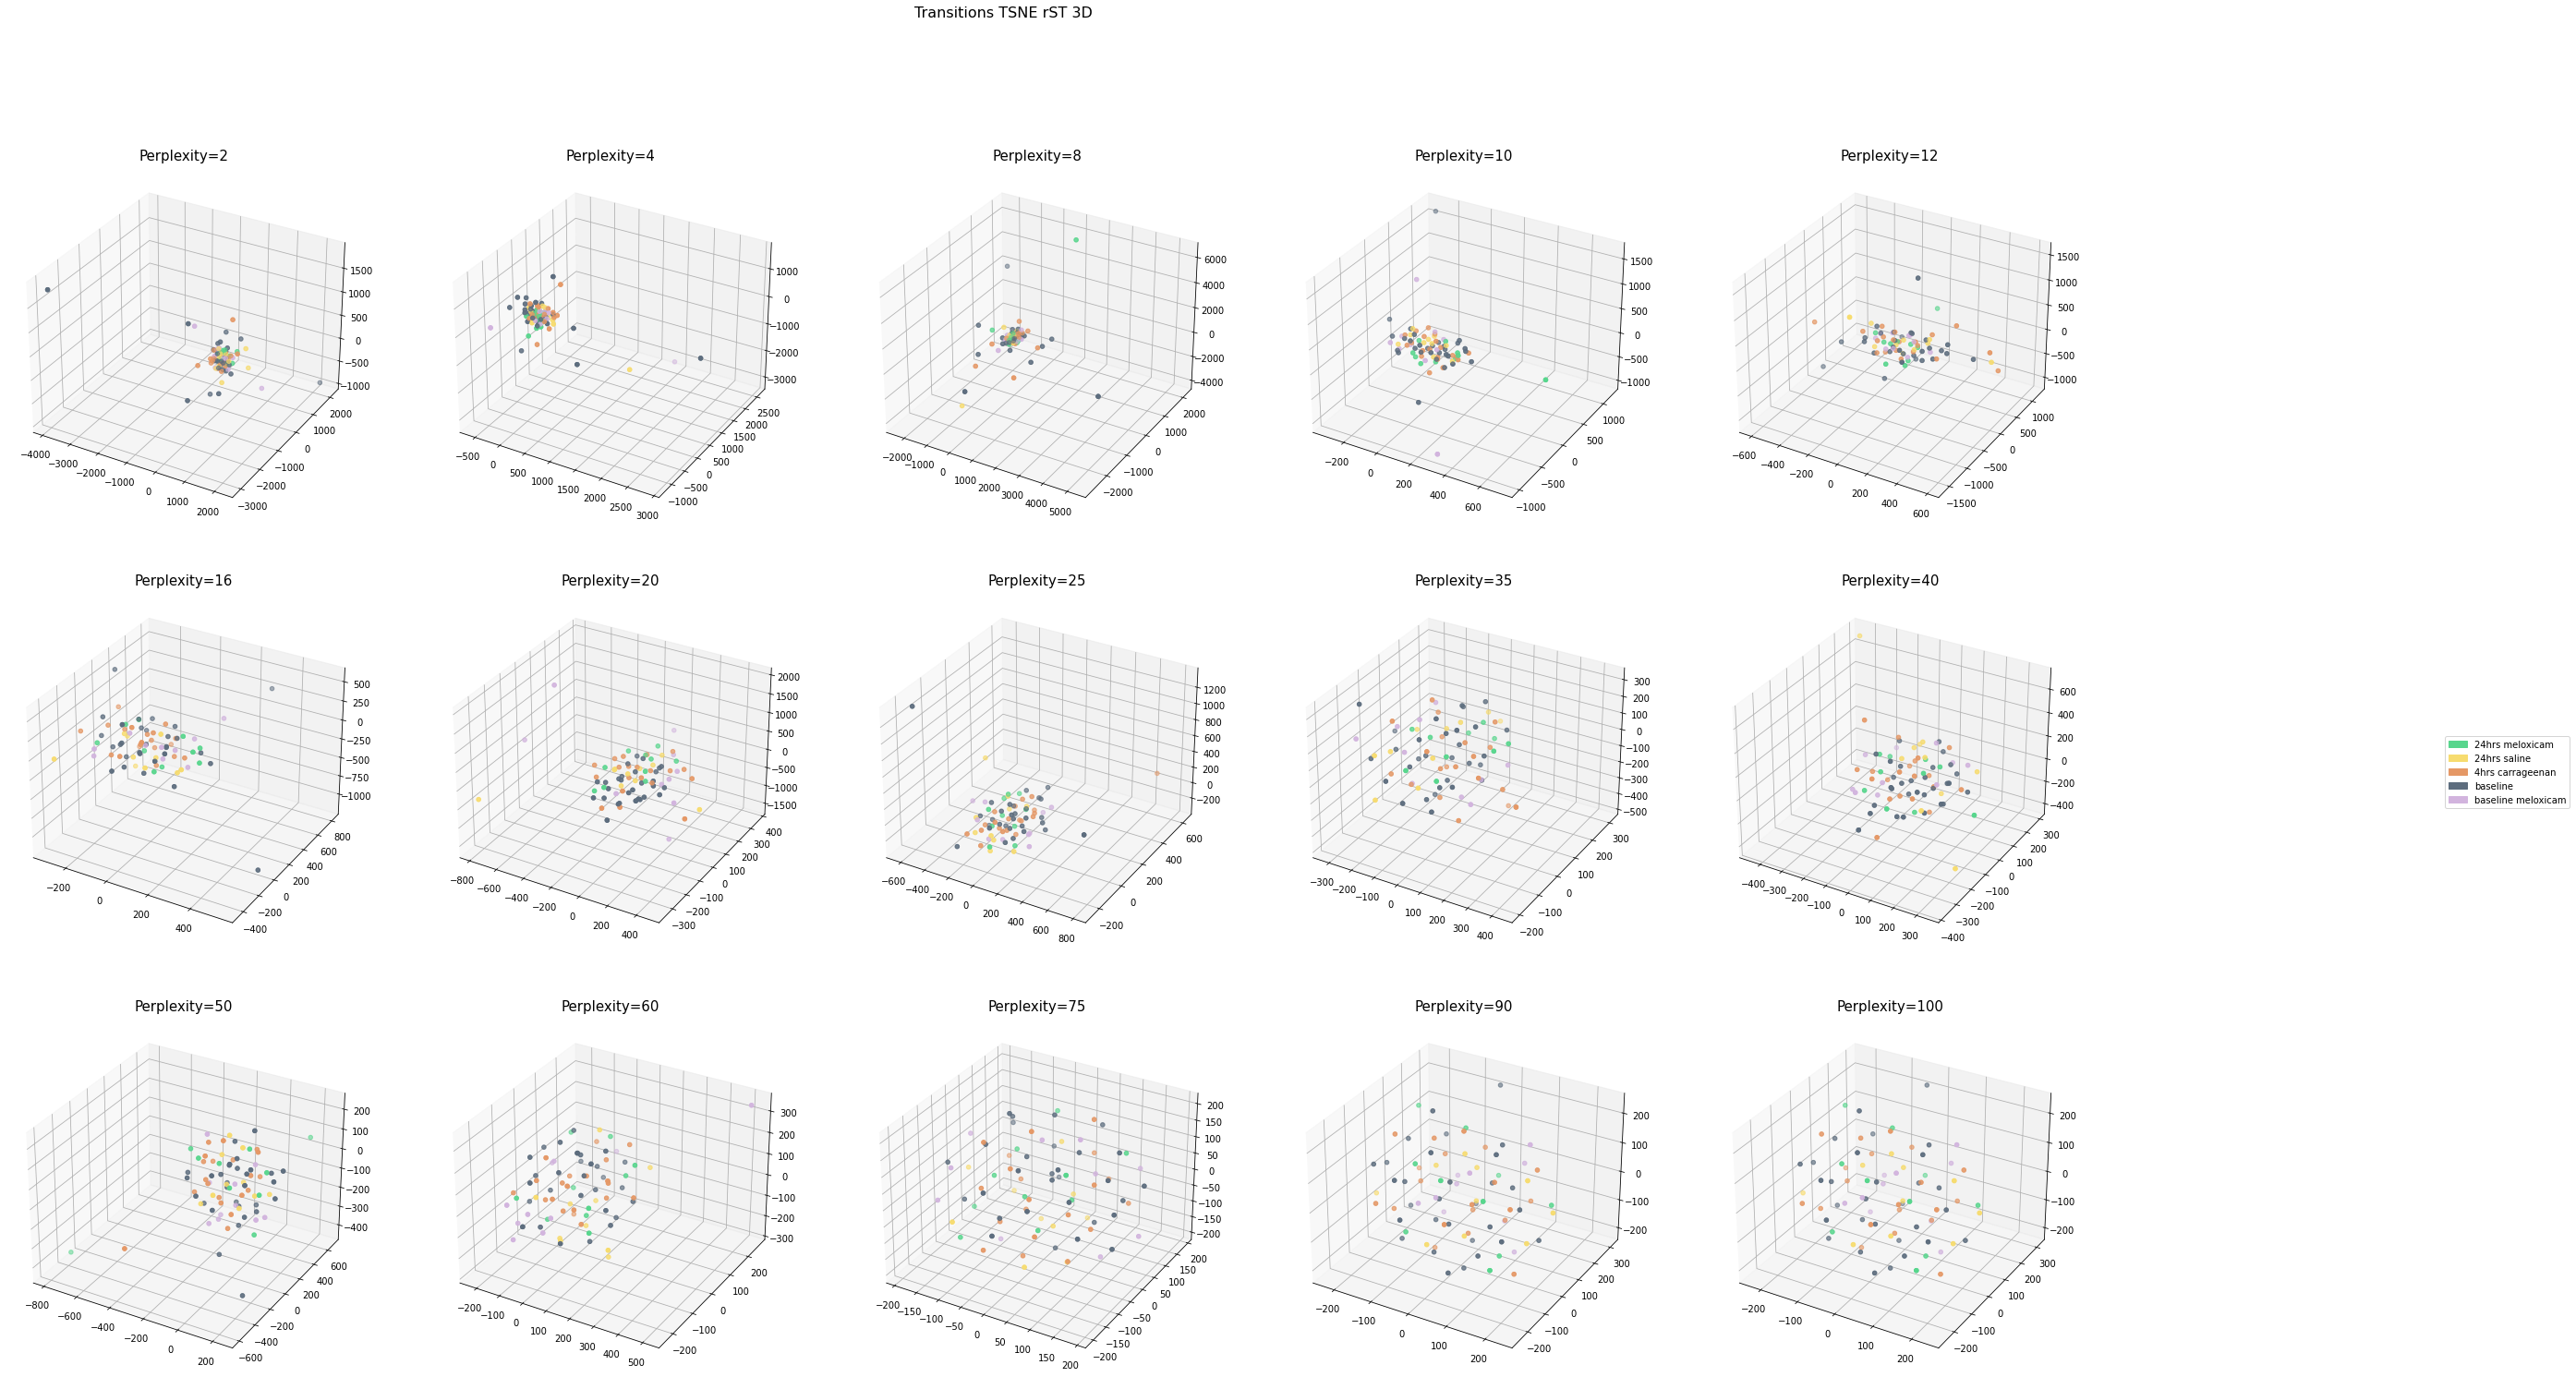

In [13]:
fig = plt.figure(figsize=(40,24))
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for i, perplexity in enumerate(perplexities):
    ax = fig.add_subplot(3, 5, i+1, projection='3d')
    x_vals, y_vals, z_vals = reduce_dimensions_3D(features, perplexity)
    plot_with_matplotlib_3D(x_vals, y_vals, z_vals, labels, ax, perplexity)

title = fig.suptitle('Transitions TSNE rST 3D', size='16')
fig.subplots_adjust(top=0.88)
legend = fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam],bbox_to_anchor=(1.04,0.5), loc="center left")
fig.savefig('Transitions_TSNE_rST_3D.png',bbox_extra_artists=(legend,title), bbox_inches='tight')

# gST

In [14]:
features = pd.read_csv('gST/features.csv').to_numpy()
labels = pd.read_csv('gST/labels.csv').to_numpy()

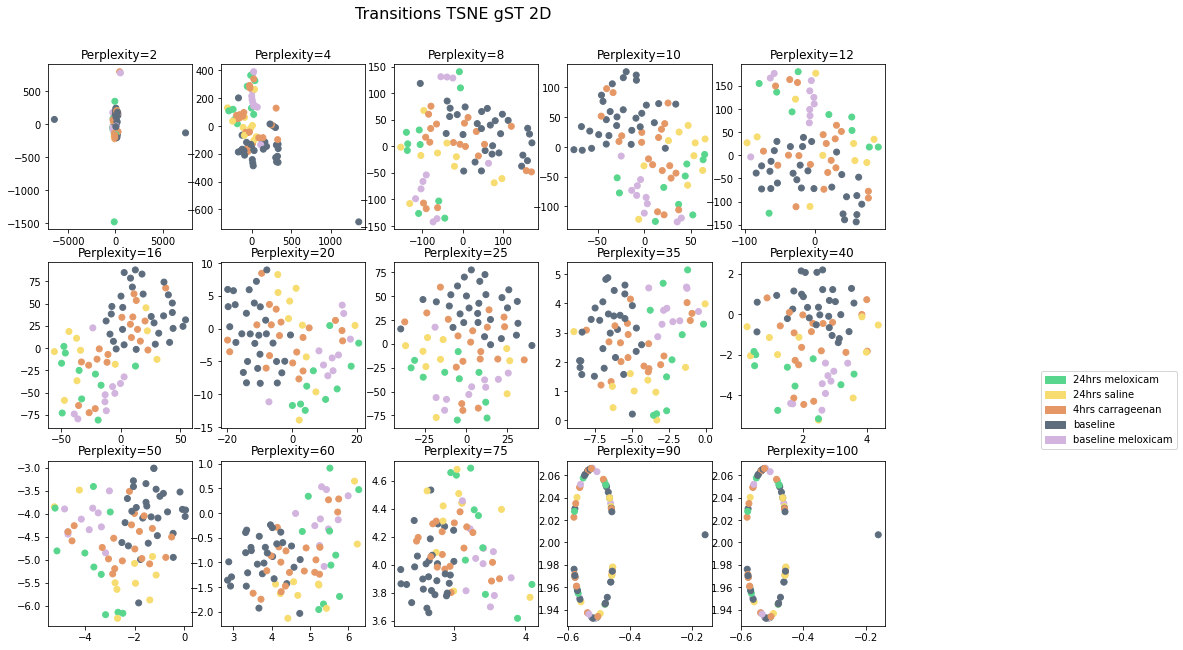

In [15]:
(fig, subplots) = plt.subplots(3,5, figsize = (15,8))
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for ax, perplexity in zip((fig.axes),perplexities):
    x_vals, y_vals = reduce_dimensions(features, perplexity)
    plot_with_matplotlib(x_vals, y_vals, labels, ax, perplexity)

title = fig.suptitle('Transitions TSNE gST 2D',x=0.5, y=1.2, size='16')
fig.subplots_adjust(top=1.1)
legend = fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam],bbox_to_anchor=(1.04,0.5), loc="center left")
fig.savefig('Transitions_TSNE_gST_2D.png',bbox_extra_artists=(legend,title), bbox_inches='tight')

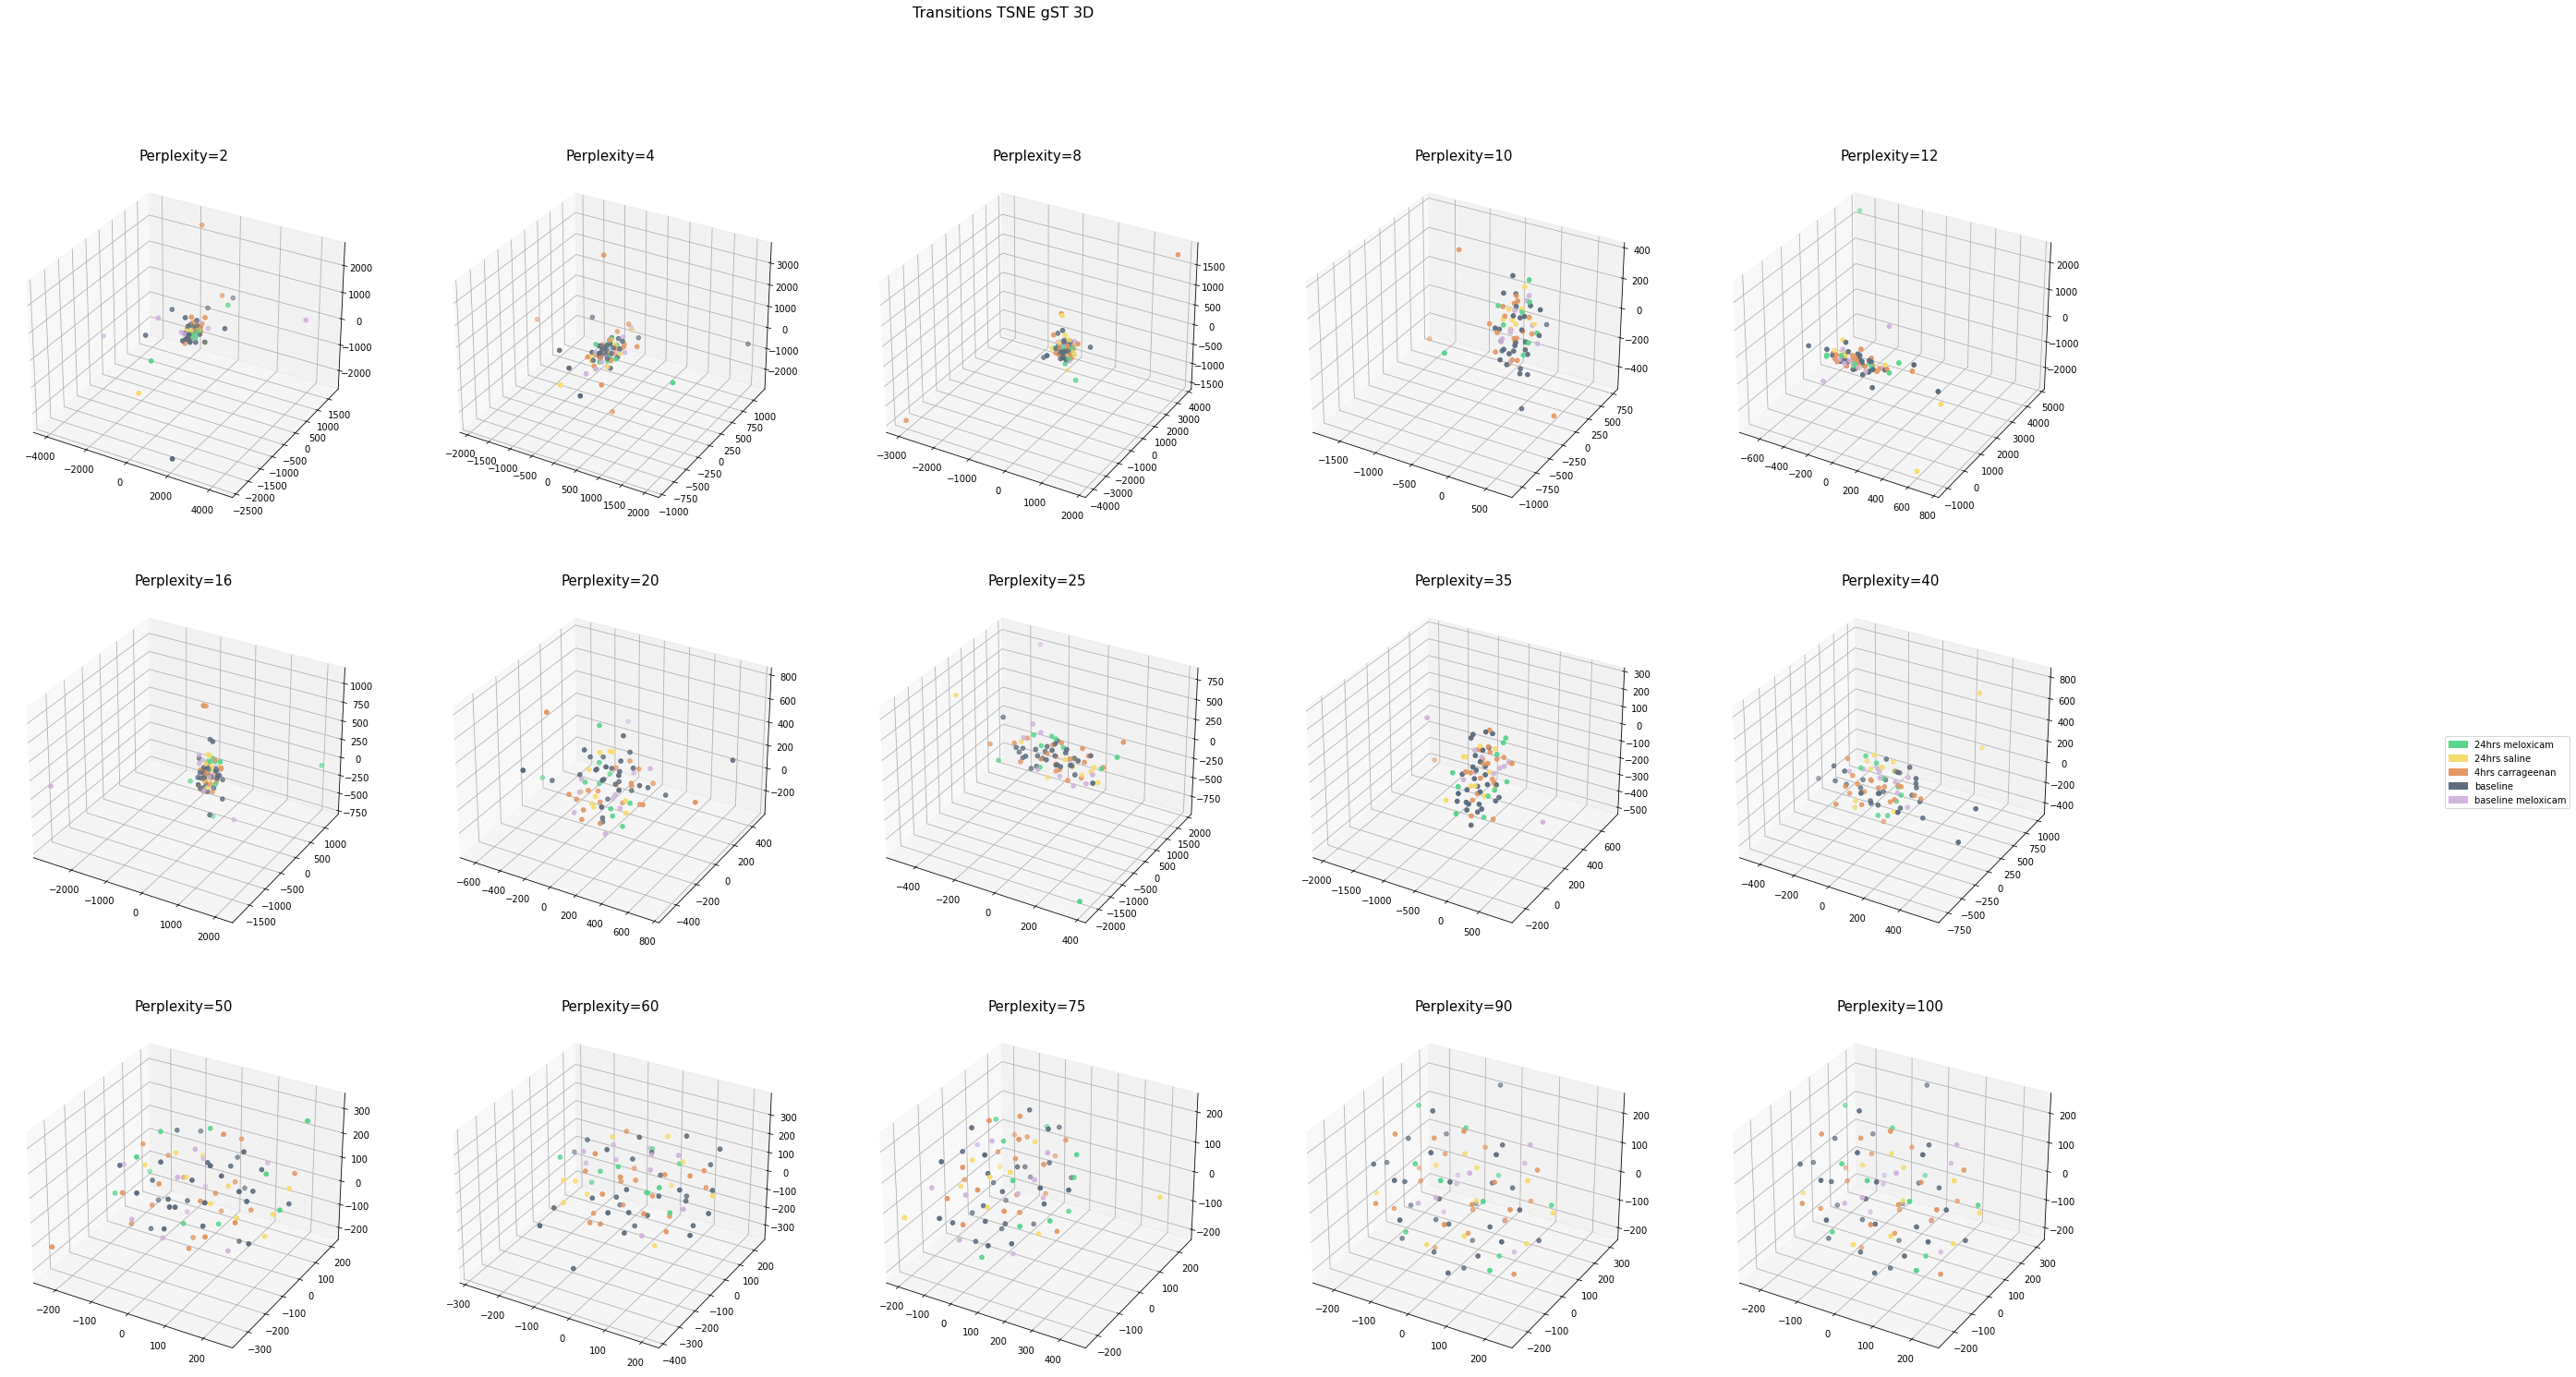

In [16]:
fig = plt.figure(figsize=(40,24))
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for i, perplexity in enumerate(perplexities):
    ax = fig.add_subplot(3, 5, i+1, projection='3d')
    x_vals, y_vals, z_vals = reduce_dimensions_3D(features, perplexity)
    plot_with_matplotlib_3D(x_vals, y_vals, z_vals, labels, ax, perplexity)

title = fig.suptitle('Transitions TSNE gST 3D', size='16')
fig.subplots_adjust(top=0.88)
legend = fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam],bbox_to_anchor=(1.04,0.5), loc="center left")
fig.savefig('Transitions_TSNE_gST_3D.png',bbox_extra_artists=(legend,title), bbox_inches='tight')

# gOT

In [17]:
features = pd.read_csv('gOT/features.csv').to_numpy()
labels = pd.read_csv('gOT/labels.csv').to_numpy()

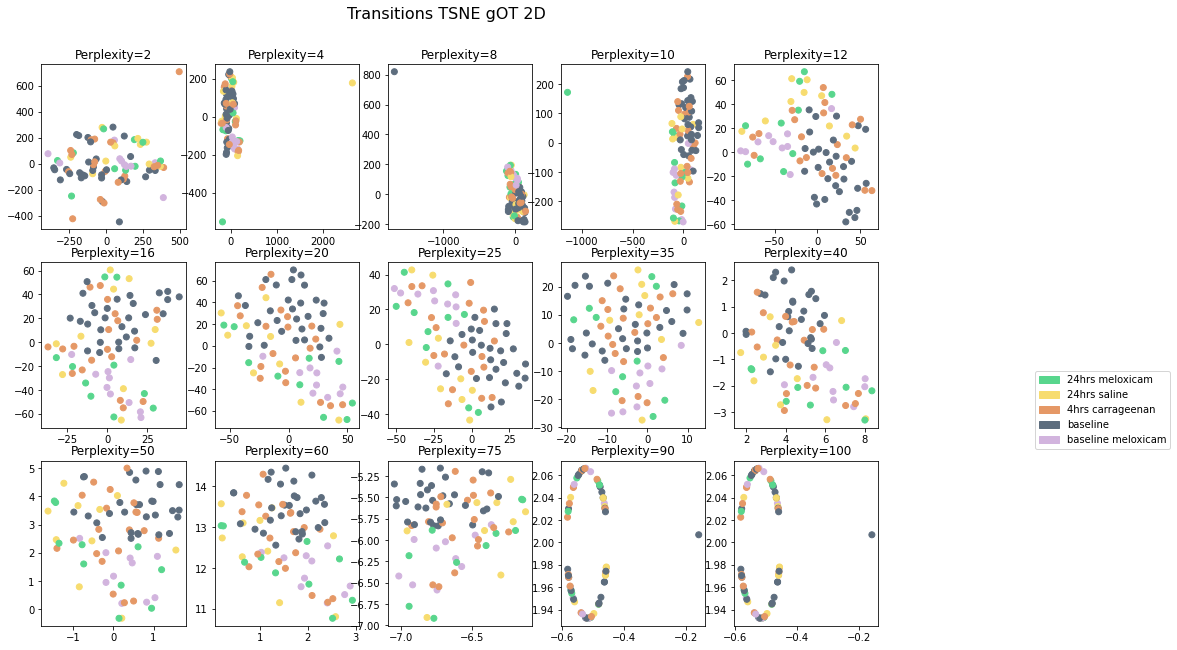

In [18]:
(fig, subplots) = plt.subplots(3,5, figsize = (15,8))
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for ax, perplexity in zip((fig.axes),perplexities):
    x_vals, y_vals = reduce_dimensions(features, perplexity)
    plot_with_matplotlib(x_vals, y_vals, labels, ax, perplexity)

title = fig.suptitle('Transitions TSNE gOT 2D',x=0.5, y=1.2, size='16')
fig.subplots_adjust(top=1.1)
legend = fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam],bbox_to_anchor=(1.04,0.5), loc="center left")
fig.savefig('Transitions_TSNE_gOT_2D.png',bbox_extra_artists=(legend,title), bbox_inches='tight')

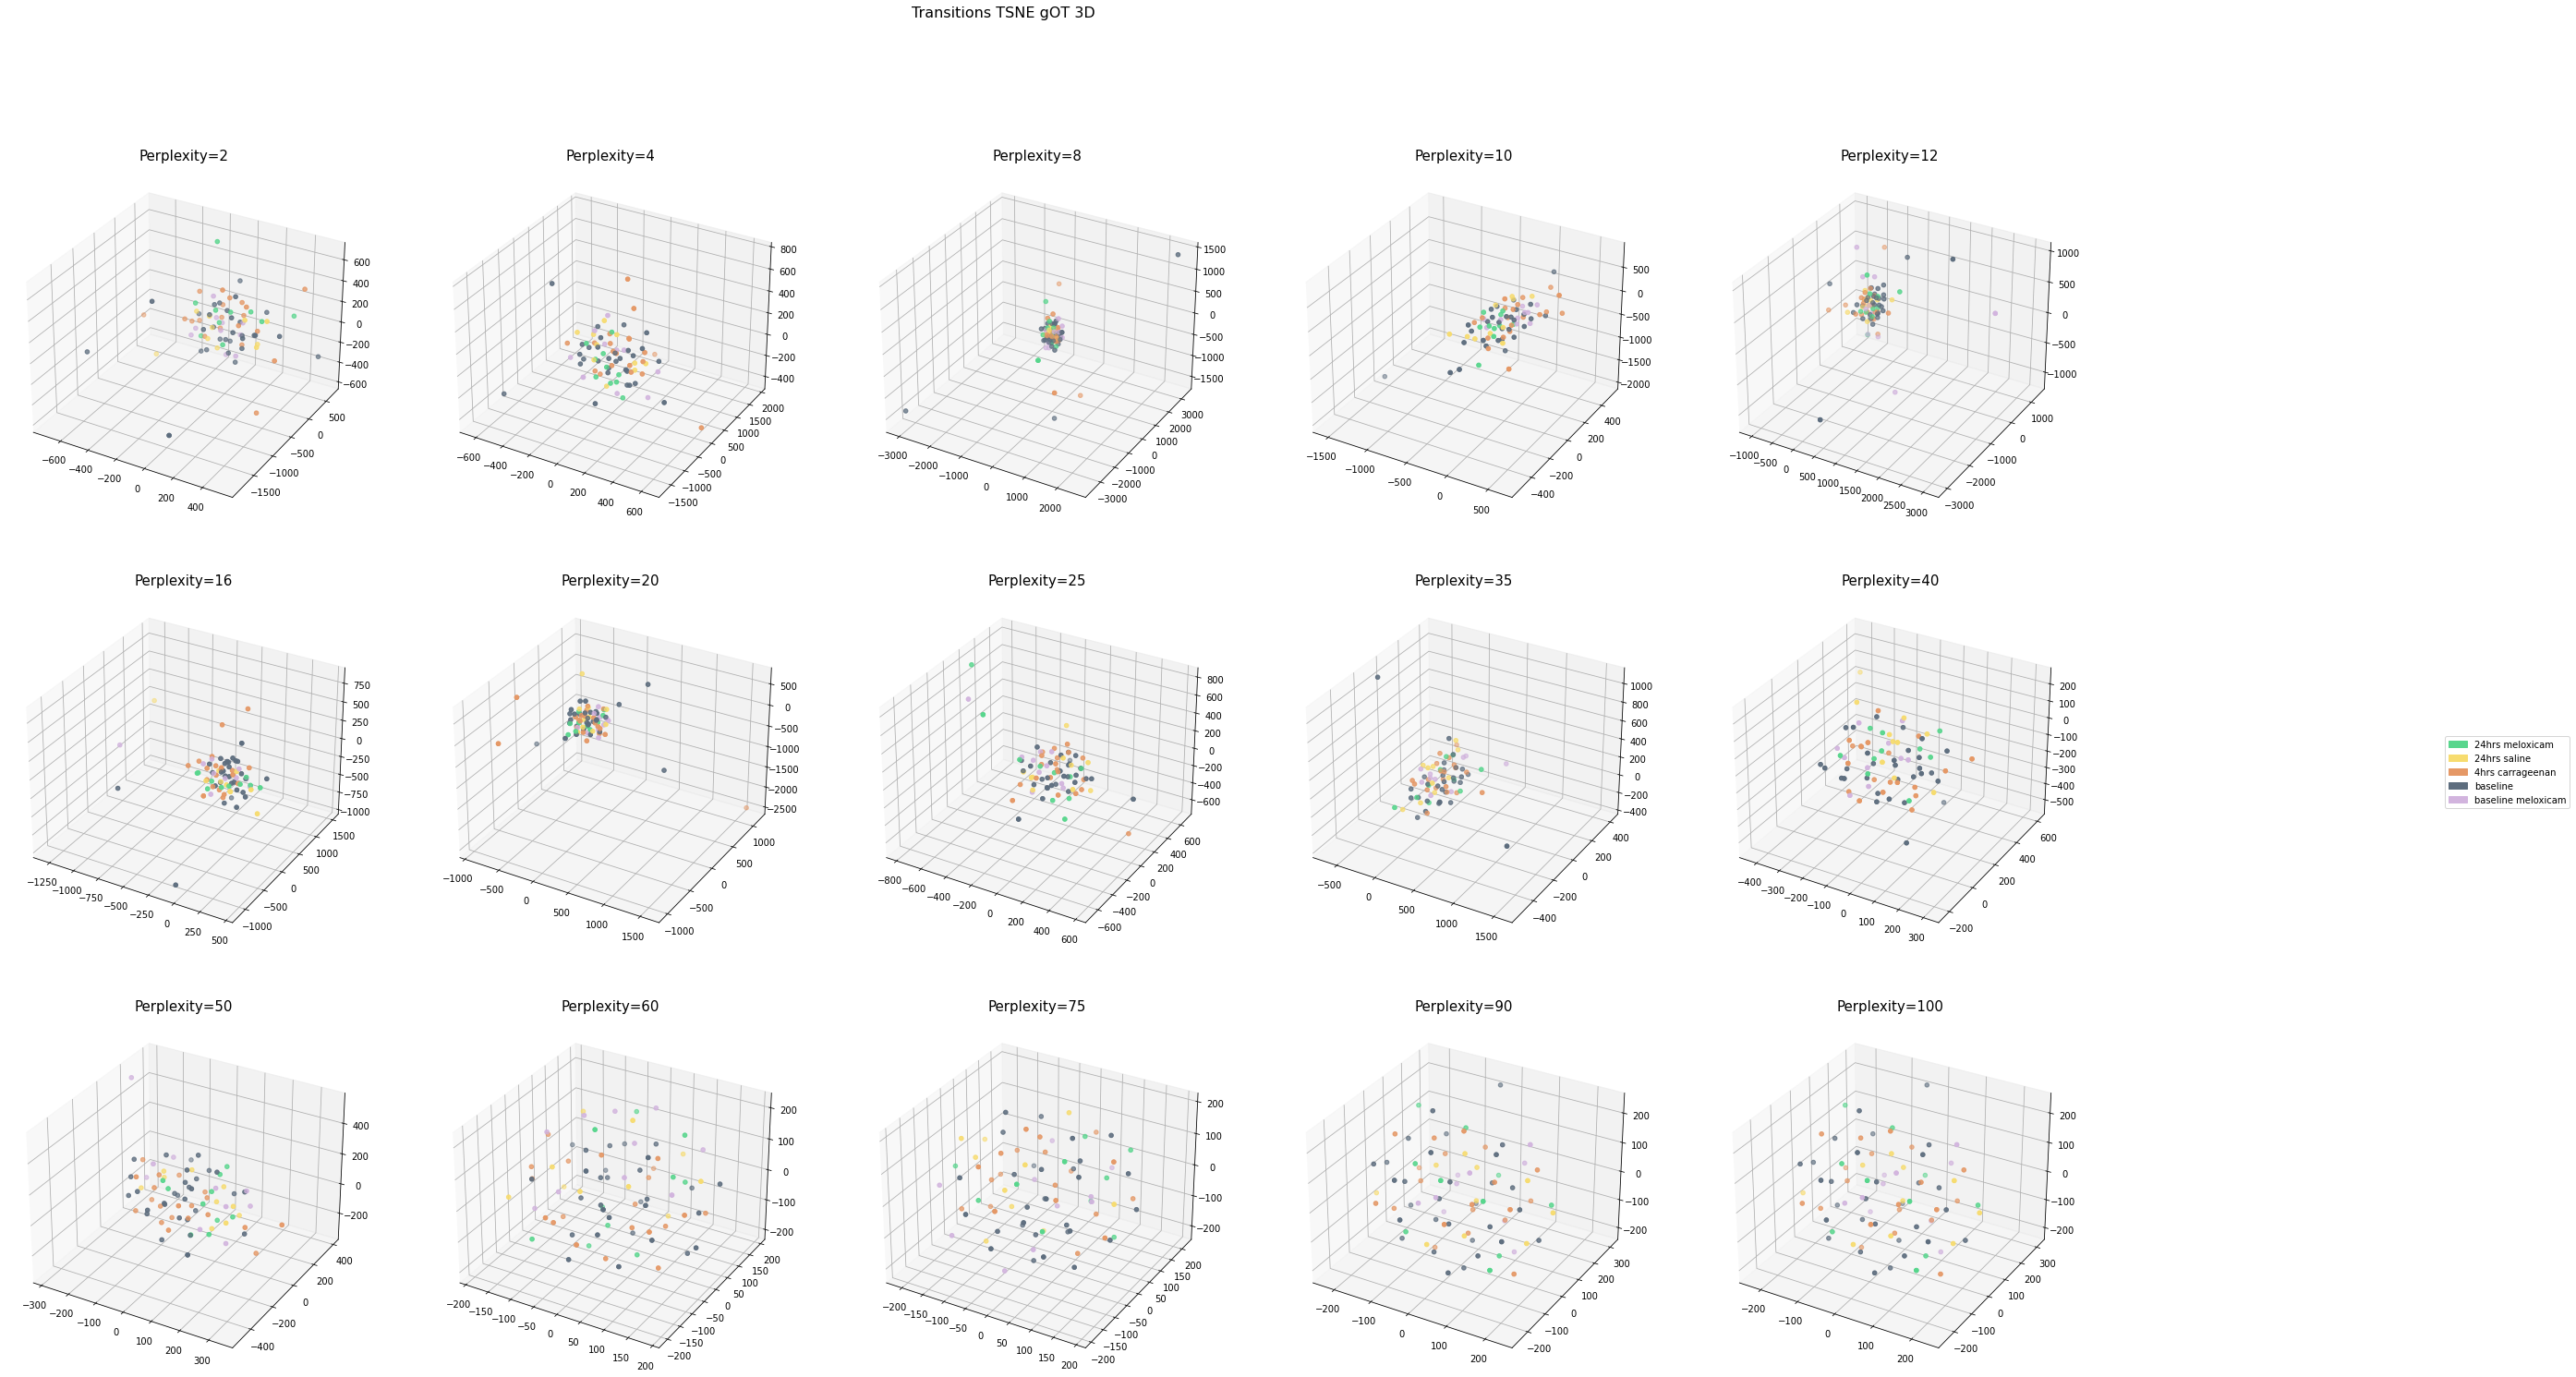

In [19]:
fig = plt.figure(figsize=(40,24))
perplexities = [2,4,8,10,12,16,20,25,35,40,50,60,75,90,100]
len(perplexities)

for i, perplexity in enumerate(perplexities):
    ax = fig.add_subplot(3, 5, i+1, projection='3d')
    x_vals, y_vals, z_vals = reduce_dimensions_3D(features, perplexity)
    plot_with_matplotlib_3D(x_vals, y_vals, z_vals, labels, ax, perplexity)

title = fig.suptitle('Transitions TSNE gOT 3D', size='16')
fig.subplots_adjust(top=0.88)
legend = fig.legend(handles=[meloxicam24h,saline24h,carrageenan,baseline,baselineMeloxicam],bbox_to_anchor=(1.04,0.5), loc="center left")
fig.savefig('Transitions_TSNE_gOT_3D.png',bbox_extra_artists=(legend,title), bbox_inches='tight')